# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Mean Squared Error

In [2]:
knob_weight = 0.5
inp = 0.5
goal_pred = 0.8
pred = inp * knob_weight
error = (pred - goal_pred) ** 2
print("{:0.4f}".format(error))

0.3025


# Hot and Cold learning
   This gives a `hot or cold` type signal.<br>
   It won’t tell you why you missed, what direction you missed,<br>
   or what you should do to fix the error. It more or less<br>
   says `big miss`, `little miss`, or `perfect prediction`.

In [3]:
weight = 0.1
lr = 0.01
def neural_netwrok(inp, weight):
    prediction = inp * weight
    return prediction
n_toes = [8.5]
goal_pred = 1
pred = neural_netwrok(n_toes[0],weight)
error = (goal_pred - pred) ** 2
print("True error: {:0.4f}".format(error))
pred_up = neural_netwrok(n_toes[0],weight+(2*lr))
error = (goal_pred - pred_up) ** 2
print("Increased Weight error: {:0.4f}".format(error))
pred_down = neural_netwrok(n_toes[0],weight-lr)
error = (goal_pred - pred_down) ** 2
print("Decreased Weight error: {:0.4f}".format(error))

True error: 0.0225
Increased Weight error: 0.0004
Decreased Weight error: 0.0552


# Relation between Weight and Error

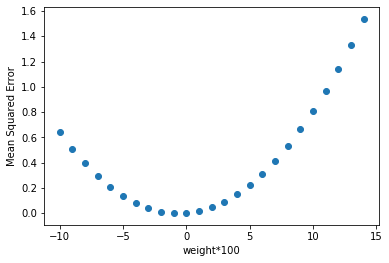

In [3]:
def neural_netwrok(inp, weight):
    prediction = inp * weight
    return prediction
weight = 0.1
n_toes = [8.5]
error = []
for i in range(-10,15):
    pred = neural_netwrok(n_toes[0],weight+(i/100))
    error.append((goal_pred - pred) ** 2)
plt.scatter(range(-10,15),error)
plt.xlabel('weight*100')
plt.ylabel('Mean Squared Error')
plt.show()

# A better code snippet for hot and cold and updation of weights

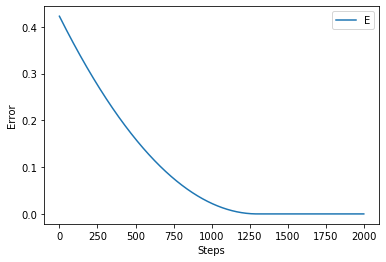

In [5]:
weight = 0.5
inp = 0.5
lr = 0.001
goal_pred = 0.9
errors = []

for i in range (2000):
    pred = weight*inp
    error = (goal_pred - pred) ** 2
    errors.append(error)
    
    pred_up = (weight+lr)*inp
    error_up = (goal_pred - pred_up) ** 2
    
    
    pred_down = (weight-lr)*inp
    error_down = (goal_pred - pred_down) ** 2
    
    
    if(error_up<error_down):
        weight = weight+lr
    elif(error_up>error_down):
        weight = weight-lr
plt.plot(range(0,len(errors)),errors)
plt.xlabel('Steps')
plt.ylabel('Error')
plt.legend('E')
plt.show()

# Problems related to hot and cold:
1. Inefficient
2. Sometimes impossible
3. Works for a select few cases

# Calculate the direction and amount of error aka `Gradient Descent`

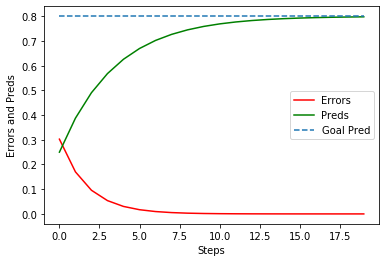

In [11]:
weight = 0.5
goal_pred = 0.8
inp = 0.5
errors = []
preds = []
for iteration in range(20):
    pred = inp * weight
    preds.append(pred)
    error = (pred - goal_pred) ** 2
    errors.append(error)
    direction_and_amount = (pred - goal_pred) * inp    # Important Step
    weight = weight - direction_and_amount
#     print("Error: {}    Predictions: {}" .format((error),(pred)))
plt.plot(range(0,len(errors)),errors, 'r')
plt.plot(range(0,len(preds)),preds, 'g')
plt.plot(range(0,len(preds)),[0.8 for x in range(len(preds))],'--')
plt.xlabel('Steps')
plt.ylabel('Errors and Preds')
plt.legend(('Errors', 'Preds','Goal Pred'))
plt.show()

# Scaling, Negative Reversal and Stopping
The main motif of delta = (input*(pred - goal_pred)) is:
* Stopping, if input is 0, the network should not learn
* Scaling, higher the inputs, more the delta, faster the network learns
* Negative reversal
    * if input is negative, the learning should be exactly the reverse of a positive input

# Error and Weight
For any `input` and `goal_pred`, an exact relationship is defined between `error` and `weight`,
found by combining the `prediction` and `error formulas`.
<img src='https://raw.githubusercontent.com/ariG23498/GrokkingDeepLearning/master/assets/error.jpeg' height=500, width=500>
> Turns out to be a parabolic relationship isn't it?

# Derivative
How much does `rod X`
move when I tug on `rod Y`
<img src='https://raw.githubusercontent.com/ariG23498/GrokkingDeepLearning/master/assets/deriv.jpeg' height=500, width=500>
> The derivative gives us the real essence of the term weight_delta,<br> gives us the sensitivity of error on weight.

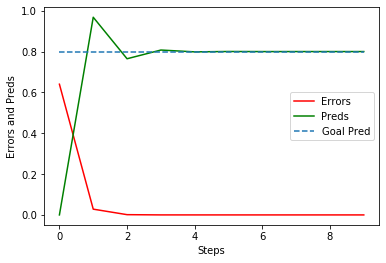

In [13]:
weight = 0.0
goal_pred = 0.8
inp = 1.1
errors = []
preds = []

for i in range(10):
    pred = inp*weight
    preds.append(pred)
    error = (pred - goal_pred) ** 2
    errors.append(error)
    delta_weight = (inp)*(pred - goal_pred)  # The derivative of error wrt weights (see the above diagram)
    weight = weight - delta_weight
plt.plot(range(0,len(errors)),errors, 'r')
plt.plot(range(0,len(preds)),preds, 'g')
plt.plot(range(0,len(preds)),[0.8 for x in range(len(preds))],'--')
plt.xlabel('Steps')
plt.ylabel('Errors and Preds')
plt.legend(('Errors', 'Preds','Goal Pred'))
plt.show()

# Enter Alpha aka Learning Rate
lr is used to make the weight_delta to increase or decrease with a fixed rate so that it is neither too `slow` nor too `fast` to overshoot. One can think of `alpha` to be a value by which the slope seems to be less steeper even when the input is large. The value of alpha decreases the sensitivity of the relation of weight to error. This will make the step size to decrease but increases the number of steps.